## PyTorch Data Process

In [1]:
import torch
from torchvision import datasets, transforms

### data loader 부르기

In [2]:
batch_size = 32
test_batch_size = 32

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5), std=(0.5))
    ])),
    batch_size=batch_size,
    shuffle = True
)

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to dataset/MNIST/raw/train-images-idx3-ubyte.gz
 99%|█████████▉| 9797632/9912422 [00:17<00:00, 1582489.88it/s]Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to dataset/MNIST/raw/train-labels-idx1-ubyte.gz

 57%|█████▋    | 16384/28881 [00:00<00:00, 89411.31it/s]
32768it [00:00, 36829.64it/s]

0it [00:00, ?it/s]Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

 92%|█████████▏| 1515520/1648877 [00:01<00:00, 1534313.56it/s]

0it [00:00, ?it/s]Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


8192it [00:01, 4772.32it/s]             Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!



In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ])),
    batch_size=test_batch_size,
    shuffle = True
)

In [6]:
## 첫번째 iteration에서 나오는 데이터 확인

In [9]:
images, labels = next(iter(train_loader))

In [11]:
images.shape

torch.Size([32, 1, 28, 28])

In [13]:
labels.shape

torch.Size([32])

In [12]:
# pytorch는 tensorflow와 다르게 [batchsize, channel, height, width]임을 명시해야함

### 데이터 시각화

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
images[0].shape

torch.Size([1, 28, 28])

In [17]:
torch_image = torch.squeeze(images[0]) # 첫번째 없애줌
torch_image.shape

torch.Size([28, 28])

In [19]:
image = torch_image.numpy()
image.shape

(28, 28)

In [20]:
label = labels[0].numpy()
label.shape

()

In [21]:
label

array(7)

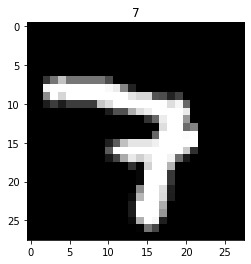

In [22]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## Pytorch Layer 이해하기

In [23]:
# 예제 불러오기
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])),
    batch_size = 1
)

In [24]:
image, label = next(iter(train_loader))

In [25]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

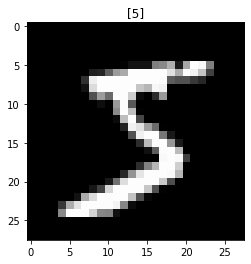

In [27]:
plt.title(label.numpy())
plt.imshow(image[0,0,:,:], 'gray')
plt.show()

## 각 Layer별 설명

In [28]:
# network 쌓기 위한 준비
import torch
import torch.nn as nn
import torch.nn.functional as F

### Covolution

In [29]:
# in_channel : 받게 될 channel의 갯수
# out_channel : 보내고 싶은 channel의 갯수
# kernel_size : 만들고 싶은 kernel(weights)의 사이즈

In [32]:
nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [33]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [38]:
# weight시각화를 위한 slice하고 numpy화
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [39]:
# 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼 수 없음
# detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [40]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

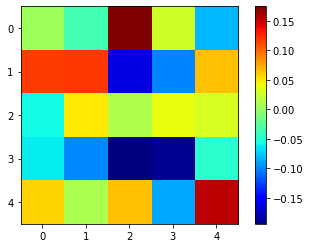

In [41]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [42]:
# output 시각화를 위한 numpy화
output_data = layer(image)

In [43]:
output_data = output_data.data
output = output_data.cpu().numpy()

In [45]:
output.shape

(1, 20, 24, 24)

In [46]:
# input으로 들어간 이미지 numpy화
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

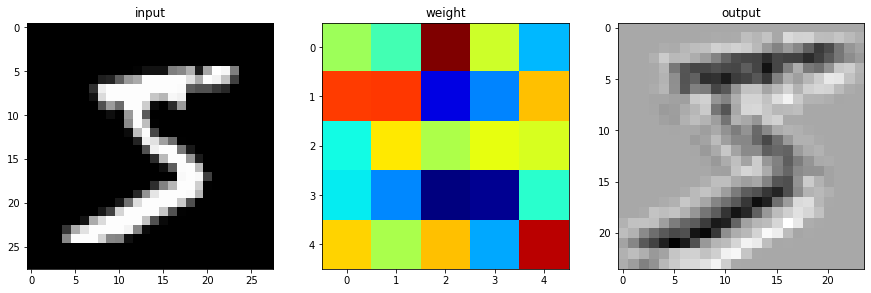

In [48]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:], 'gray')
plt.show()

## Pooling

In [49]:
# input을 먼저 앞에 넣고, 뒤에 kernel 사이즈와 stride를 순서대로 넣음
image.shape

torch.Size([1, 1, 28, 28])

In [50]:
pool = F.max_pool2d(image, 2,2)
pool.shape

torch.Size([1, 1, 14, 14])

In [51]:
# maxpool layer는 weight가 없기 때문에 바로 numpy가 가능
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [52]:
image_arr.shape

(1, 1, 28, 28)

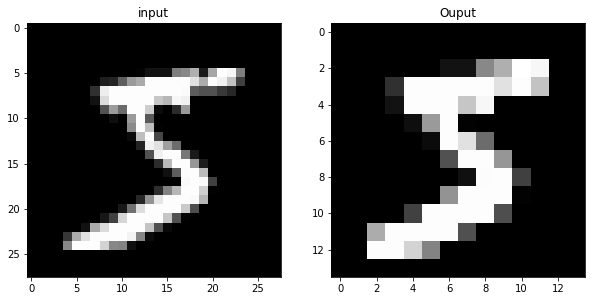

In [53]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(122)
plt.title('Ouput')
plt.imshow(np.squeeze(pool_arr), 'gray')
plt.show()

### Liner

In [54]:
# nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함
image.shape

torch.Size([1, 1, 28, 28])

In [55]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [56]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [57]:
lin

tensor([[-0.1723, -0.1552,  0.2748, -0.2867,  0.0779,  0.1510, -0.0130, -0.1679,
          0.0014,  0.2034]], grad_fn=<AddmmBackward>)

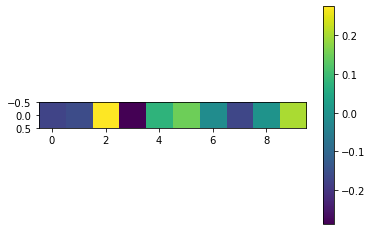

In [59]:
plt.imshow(lin.detach().numpy())  # weight가 있기 때문에 detach
plt.colorbar()
plt.show()

### softmax

In [60]:
# 결과를 numpy로 꺼내기 위해선 weight가 담긴 linear에 weight를 꺼줘야함
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim = 1)

In [61]:
softmax

tensor([[0.0771, 0.1030, 0.0944, 0.0990, 0.0985, 0.1026, 0.1075, 0.1003, 0.1221,
         0.0955]])

In [62]:
np.sum(softmax.numpy())

1.0

## Layer 쌓기

In [64]:
# nn과 nn.funtional의 차이점
# nn은 학습 파라미터가 담긴 것
# nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [77]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500,10)

    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        # Fully Connected (Classification)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1) # 열 기준
        

In [78]:
model = Net()

In [79]:
result = model.forward(image)

In [80]:
result

tensor([[-2.3286, -2.2721, -2.2940, -2.3013, -2.3163, -2.3546, -2.2934, -2.3308,
         -2.3232, -2.2181]], grad_fn=<LogSoftmaxBackward>)

In [85]:
import os
from glob import glob

import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np 

In [86]:
seed = 1

batch_size = 64
test_batch_size = 64

no_cuda = False

In [88]:
use_cuda = not no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Preprocess

In [89]:
torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size = batch_size, shuffle=True
)

tets_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False, transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=test_batch_size, shuffle=True
)

### Model

In [105]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

### Optimization

In [106]:
# model과 optimization 설정
model = Net().to(device)

In [107]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [108]:
# parameter들 확인
# weight, bias를 순서대로 보여줌

In [109]:
params = list(model.parameters())
for i in range(8):
    print(params[i].size())

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([50, 20, 5, 5])
torch.Size([50])
torch.Size([500, 800])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])


## Before Training

In [110]:
# 학습하기 전에 model이 train할 수 있도록 train mode로 변환
# convolution 또는 linear 뿐만 아니라, Dropout과 추후에 배우게 될 batch normalization과 같이 parameter를 가진 Layer들도 학습하기 위해 준비

In [111]:
model.train()  # train mode

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [112]:
# 모델에 넣기 위한 첫 batch 데이터 추출
data, target = next(iter(train_loader))

In [113]:
data.shape, target.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [114]:
# gradient를 clear해서 새로운 최적화 값을 찾기 위해 준비
optimizer.zero_grad()

In [115]:
# 준비한 데이터를 model에 input으로 넣어 output을 얻음
output = model(data)

In [116]:
# model에서 예측한 결과를 loss funtion에 넣음
# 여기 예제에서는 negative log-likelihood loss라는 loss function을 사용
loss = F.nll_loss(output, target)

In [117]:
# Back Propagation을 통해 Gradient를 계산
loss.backward()

In [119]:
# 계산된 Gradient는 계산된 걸로 끝이 아니라 Parameter에 Update
optimizer.step()

## Start Training

In [120]:
# 위의 최적화 과정을 반복하여 학습 시작
epochs = 1
log_interval = 100

In [124]:
for epoch in range(1, epochs):
    # train mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval ==0 :
            print('Train Epoch: {} [{}/{} ({:.0f})%]`tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100*batch_idx /len(train_loader), loss.item()
            ))

## Evaluation